In [1]:
# !pip install konlpy

In [2]:
# !pip install nltk

In [3]:
import os
import sys
import time
import urllib.request
import datetime
import time
import json
from bs4 import BeautifulSoup
import pandas as pd
import math
import requests
import re
from tqdm import tqdm

In [4]:
from konlpy.tag import Kkma        
kkma = Kkma()
from konlpy.tag import Hannanum    
hannanum = Hannanum()
from konlpy.tag import Okt         
t = Okt() 
from konlpy.tag import *
import nltk
import pickle
import copy
from tqdm import tqdm

In [5]:
news_data = pd.read_csv('./AI 뉴스 데이터1.csv', encoding='utf-8')
news_data.head()

,날짜,제목,내용
0,2023.06.23 13:04,"셀바스AI, 유증으로 571억 확보…AI의료·교육 등 신사업 추진",\t\t\t 셀바스AI가 571억 규모의 유상증자에 성공했다.셀바스AI는 지난 21...
1,2023.06.23 10:40,"셀바스AI, 주주배정 유상증자 청약 완료",\t\t\t [서울=뉴시스]우연수 기자 = 셀바스AI가 400만주를 모집하는 주주 ...
2,2023.06.23 10:00,"셀바스AI, 571억원 규모 구주주 배정 유상증자 성공",유상증자 청약률 100.80%AI의료·교육·메타로빌리티 신사업 탄력 ◆…셀바스AI ...
3,2023.06.23 09:49,"셀바스AI, 유상증자 청약률 100.80% 기록…571억원 확보",의료AI·교육·메타로빌리티 신사업 탄력셀바스AI는 571억원 규모의 유상증자에 성공...
4,2023.06.22 10:48,"셀바스AI, AI 의료서비스 본격 추진",제이엘케이 솔루션에 연동[이데일리 최훈길 기자] 인공지능(AI) 전문기업 셀바스AI...


In [6]:
import re
regex = r'[^\w\s]'
# text 열의 모든 값을 대상으로 정규표현식을 적용하여 특수문자를 제거
news_data['내용정리'] = news_data['내용'].apply(lambda x: re.sub(regex, ' ', str(x)))
news_data['내용정리'][0]

'\t\t\t 셀바스AI가 571억 규모의 유상증자에 성공했다 셀바스AI는 지난 21일부터 22일가지 기존 주주들을 대상으로 진행한 유상증자 청약률이 100 8 를 기록했다고 23일 밝혔다 발행 예정 주식수는 400만주로 총 571억원 규모이다  이에 따라 26일부터 27일까지 진행 예정이었던 일반공모는 실시되지 않는다  신주 상장 예정일은 7월 12일이다 셀바스AI는 이번 유상증자가 지난 4월 발표한 AI 인공지능 의료  교육   메타로빌리티 메타버스  로봇  모빌리티  등 신사업 확대를 위해서라고 설명했다  셀바스AI는 각 분야별 디지털 전환은 물론 경영 혁신을 지원한다는 계획이다 세부적으로 셀바스AI는 셀비 체크업  셀비 메디보이스 등 제품을 통해 AI의료 사업을 본격 확대하고 있다  올해부터는 군 이동형 원격의료도 본격화될 예정이다  20225년부터 정부의 AI 디지털교과서 도입 등 인공지능이 교육 산업에도 본격 확대되는 것에 대응해 영어회화 솔루션  토킹GPT 를 개발 하는 등 인공지능을 여러 분야로 확대시킬 수 있는 준비를 하고 있다 곽민철 셀바스AI 대표는  당사의 성장계획을 신뢰하고 증자에 참여해주신 주주들에게 감사하다 며  제시한 비전을 빠르게 실현해 차별화된 성장을 만들어 기업가치 상승과 주주가치 제고에 최선을 다할 것 이라고 말했다 '

In [7]:
news_data['내용정리']

0     \t\t\t 셀바스AI가 571억 규모의 유상증자에 성공했다 셀바스AI는 지난 21...
1     \t\t\t  서울 뉴시스 우연수 기자   셀바스AI가 400만주를 모집하는 주주 ...
2     유상증자 청약률 100 80 AI의료 교육 메타로빌리티 신사업 탄력   셀바스AI ...
3     의료AI 교육 메타로빌리티 신사업 탄력셀바스AI는 571억원 규모의 유상증자에 성공...
4     제이엘케이 솔루션에 연동 이데일리 최훈길 기자  인공지능 AI  전문기업 셀바스AI...
                            ...                        
87    \t\t\t  영상인식 인공지능 AI  전문업체 알체라 주가가 강세다  정부가 인공...
88    기사내용 요약일반 가공부터 AI 가공까지 지원3월 말까지 신청 가능 서울 뉴시스  ...
89    알체라 제공 서울 뉴스1  임해중 기자   영상인식 AI 전문기업 알체라가 16일 ...
90    \t\t\t  영상인식 AI 전문업체 알체라 주가가 강세다   스마트 뷰잉 SMAR...
91    AI 서비스 매칭 플랫폼 AI히어로즈 통해알체라 솔루션 도입 희망 수요기업 모집작년...
Name: 내용정리, Length: 92, dtype: object

In [8]:
pos_tag = []

# news_data 데이터프레임의 각 행에 대해 반복
for _, row in tqdm(news_data.iterrows()):
    # 현재 행의 content 값을 news_text 변수에 할당
    news_text = row['내용정리']
    
    # PosTagging
    tokens_ko = t.pos(news_text)
    pos_tag.append(tokens_ko)

0it [00:00, ?it/s]

92it [00:10,  8.98it/s]


In [9]:
#첫번째 행의 Pos Tagging
print(pos_tag[0])

[('\t\t\t ', 'Foreign'), ('셀', 'Noun'), ('바스', 'Noun'), ('AI', 'Alpha'), ('가', 'Verb'), ('571억', 'Number'), ('규모', 'Noun'), ('의', 'Josa'), ('유상증자', 'Noun'), ('에', 'Josa'), ('성공했다', 'Adjective'), ('셀', 'Noun'), ('바스', 'Noun'), ('AI', 'Alpha'), ('는', 'Verb'), ('지난', 'Noun'), ('21일', 'Number'), ('부터', 'Foreign'), ('22일', 'Number'), ('가지', 'Foreign'), ('기존', 'Noun'), ('주주', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('대상', 'Noun'), ('으로', 'Josa'), ('진행', 'Noun'), ('한', 'Josa'), ('유상증자', 'Noun'), ('청약', 'Noun'), ('률', 'Noun'), ('이', 'Josa'), ('100', 'Number'), ('8', 'Number'), ('를', 'Noun'), ('기록', 'Noun'), ('했다고', 'Verb'), ('23일', 'Number'), ('밝혔다', 'Verb'), ('발행', 'Noun'), ('예정', 'Noun'), ('주', 'Modifier'), ('식수', 'Noun'), ('는', 'Josa'), ('400만', 'Number'), ('주로', 'Foreign'), ('총', 'Noun'), ('571억원', 'Number'), ('규모', 'Noun'), ('이다', 'Josa'), ('이', 'Noun'), ('에', 'Josa'), ('따라', 'Verb'), ('26일', 'Number'), ('부터', 'Foreign'), ('27일', 'Number'), ('까지', 'Foreign'), ('진행', 'Noun'), ('예정', 'Noun

In [10]:
normalization_li = []
for pos in pos_tag: 
    in_li = []
    for ele in pos:
        #품사가 조사, 접속사이면 continue
        if ele[1] in ['Josa','Suffix']:
            continue
        in_li.append(ele[0])
    normalization_li.append(in_li)
print(normalization_li[0])

['\t\t\t ', '셀', '바스', 'AI', '가', '571억', '규모', '유상증자', '성공했다', '셀', '바스', 'AI', '는', '지난', '21일', '부터', '22일', '가지', '기존', '주주', '대상', '진행', '유상증자', '청약', '률', '100', '8', '를', '기록', '했다고', '23일', '밝혔다', '발행', '예정', '주', '식수', '400만', '주로', '총', '571억원', '규모', '이', '따라', '26일', '부터', '27일', '까지', '진행', '예정', '이었던', '일', '반', '공모', '실시', '되지', '않는다', '신주', '상장', '예정일', '7월', '12일', '이다', '셀', '바스', 'AI', '는', '이번', '유상증자', '지난', '4월', '발표', 'AI', '인공', '지능', '의료', '교육', '메타', '빌리', '티', '메타', '버스', '로봇', '모빌리티', '등', '신', '사업', '확대', '위', '해서라고', '설명', '했다', '셀', '바스', 'AI', '는', '각', '분야', '별', '디지털', '전환', '물론', '경영', '혁신', '지', '원', '한다는', '계획', '세부', '셀', '바스', 'AI', '는', '셀비', '체크', '업', '셀비', '메디', '보이스', '등', '제품', '통해', 'AI', '의료', '사업', '본격', '확대', '있다', '올해', '군', '이동형', '원', '격의', '료', '본격', '될', '예정', '20225년', '부터', '정부', 'AI', '디지털교과서', '도입', '등', '인공', '지능', '교육', '산업', '본격', '확대', '되는', '것', '대응', '해', '영어', '회화', '솔루션', '토킹', 'GPT', '를', '개발', '하는', '등', '인공', '지능', '여

In [11]:
with open('./stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.replace('\n','') for x in stopwords] # stopword 파일의 줄바꿈 문자 제거
okt = Okt()

In [12]:
tokens = normalization_li
token_stop = []
for token in tokens:
    in_li = []
    for tok in token:
        if tok not in stopwords:
            in_li.append(tok)
    token_stop.append(in_li)
print(token_stop[0]) 

['\t\t\t ', '셀', '바스', 'AI', '571억', '규모', '유상증자', '성공했다', '셀', '바스', 'AI', '는', '지난', '21일', '22일', '가지', '기존', '주주', '대상', '진행', '유상증자', '청약', '률', '100', '8', '기록', '했다고', '23일', '밝혔다', '발행', '예정', '주', '식수', '400만', '주로', '총', '571억원', '규모', '26일', '27일', '진행', '예정', '이었던', '반', '공모', '실시', '되지', '않는다', '신주', '상장', '예정일', '7월', '12일', '이다', '셀', '바스', 'AI', '는', '유상증자', '지난', '4월', '발표', 'AI', '인공', '지능', '의료', '교육', '메타', '빌리', '티', '메타', '버스', '로봇', '모빌리티', '신', '사업', '확대', '위', '해서라고', '설명', '했다', '셀', '바스', 'AI', '는', '분야', '별', '디지털', '전환', '경영', '혁신', '지', '원', '한다는', '계획', '세부', '셀', '바스', 'AI', '는', '셀비', '체크', '업', '셀비', '메디', '보이스', '제품', '통해', 'AI', '의료', '사업', '본격', '확대', '올해', '군', '이동형', '원', '격의', '료', '본격', '될', '예정', '20225년', '정부', 'AI', '디지털교과서', '도입', '인공', '지능', '교육', '산업', '본격', '확대', '되는', '대응', '해', '영어', '회화', '솔루션', '토킹', 'GPT', '개발', '하는', '인공', '지능', '여러', '분야', '확대', '시킬', '수', '있는', '준비', '하고', '곽민철', '셀', '바스', 'AI', '대표', '당사', '성장', '계획', '신뢰', '증자'

In [13]:
df_li = []
for tokens in token_stop:
    token = ' '.join(tokens)
    df_li.append(token)
df = pd.DataFrame(df_li).rename(columns = {0:'처리_내용'})
df.head()

,처리_내용
0,\t\t\t 셀 바스 AI 571억 규모 유상증자 성공했다 셀 바스 AI 는 지난...
1,\t\t\t 서울 뉴시스 우연 수 기자 셀 바스 AI 400만 주를 모집 하는 ...
2,유상증자 청약 률 100 80 AI 의료 교육 메타 빌리 티 신 사업 탄력 셀 바스...
3,의료 AI 교육 메타 빌리 티 신 사업 탄력 셀 바스 AI 는 571억원 규모 유상...
4,제이 케이 솔루션 연동 이데일리 최훈 길 기자 인공 지능 AI 전문 기업 셀 바스 ...


In [14]:
news_data = pd.concat([news_data,df],axis=1)
#비어있는 5개의 행은 '없음'으로 결측치 처리
news_data['내용정리'] = news_data['내용정리'].fillna('없음')
news_data['처리_내용'] = news_data['처리_내용'].fillna('없음')
news_data.head()

,날짜,제목,내용,내용정리,처리_내용
0,2023.06.23 13:04,"셀바스AI, 유증으로 571억 확보…AI의료·교육 등 신사업 추진",\t\t\t 셀바스AI가 571억 규모의 유상증자에 성공했다.셀바스AI는 지난 21...,\t\t\t 셀바스AI가 571억 규모의 유상증자에 성공했다 셀바스AI는 지난 21...,\t\t\t 셀 바스 AI 571억 규모 유상증자 성공했다 셀 바스 AI 는 지난...
1,2023.06.23 10:40,"셀바스AI, 주주배정 유상증자 청약 완료",\t\t\t [서울=뉴시스]우연수 기자 = 셀바스AI가 400만주를 모집하는 주주 ...,\t\t\t 서울 뉴시스 우연수 기자 셀바스AI가 400만주를 모집하는 주주 ...,\t\t\t 서울 뉴시스 우연 수 기자 셀 바스 AI 400만 주를 모집 하는 ...
2,2023.06.23 10:00,"셀바스AI, 571억원 규모 구주주 배정 유상증자 성공",유상증자 청약률 100.80%AI의료·교육·메타로빌리티 신사업 탄력 ◆…셀바스AI ...,유상증자 청약률 100 80 AI의료 교육 메타로빌리티 신사업 탄력 셀바스AI ...,유상증자 청약 률 100 80 AI 의료 교육 메타 빌리 티 신 사업 탄력 셀 바스...
3,2023.06.23 09:49,"셀바스AI, 유상증자 청약률 100.80% 기록…571억원 확보",의료AI·교육·메타로빌리티 신사업 탄력셀바스AI는 571억원 규모의 유상증자에 성공...,의료AI 교육 메타로빌리티 신사업 탄력셀바스AI는 571억원 규모의 유상증자에 성공...,의료 AI 교육 메타 빌리 티 신 사업 탄력 셀 바스 AI 는 571억원 규모 유상...
4,2023.06.22 10:48,"셀바스AI, AI 의료서비스 본격 추진",제이엘케이 솔루션에 연동[이데일리 최훈길 기자] 인공지능(AI) 전문기업 셀바스AI...,제이엘케이 솔루션에 연동 이데일리 최훈길 기자 인공지능 AI 전문기업 셀바스AI...,제이 케이 솔루션 연동 이데일리 최훈 길 기자 인공 지능 AI 전문 기업 셀 바스 ...


In [15]:
# news_data.to_csv('셀바스AI_preprocess.csv', index=False, encoding='utf-8-sig')

In [17]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma        ; kkma = Kkma()
from konlpy.tag import Hannanum    ; hannanum = Hannanum()
from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *
import nltk
import pickle

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [18]:
AI셀바스_process = pd.read_csv('./셀바스AI_preprocess.csv')

In [19]:
news_text = ''
news_data = AI셀바스_process.reset_index(drop=True)
for _, row in news_data.iterrows():
    news_text += row['처리_내용']

In [20]:
tokens_ko = t.morphs(news_text)
ko = nltk.Text(tokens_ko)

print(len(ko.tokens))          # 토큰 전체 개수
print(len(set(ko.tokens)))     # 토큰 unique 개수
print(ko.vocab().most_common(20))

20479
3175
[('AI', 405), ('의료', 225), ('했다', 179), ('투비소프트', 176), ('시장', 168), ('사업', 159), ('기업', 154), ('기술', 153), ('할', 151), ('수', 144), ('일본', 122), ('제품', 119), ('뷰노', 118), ('하는', 115), ('넥사크', 109), ('개발', 108), ('지능', 105), ('해', 104), ('국내', 102), ('데이터', 102)]


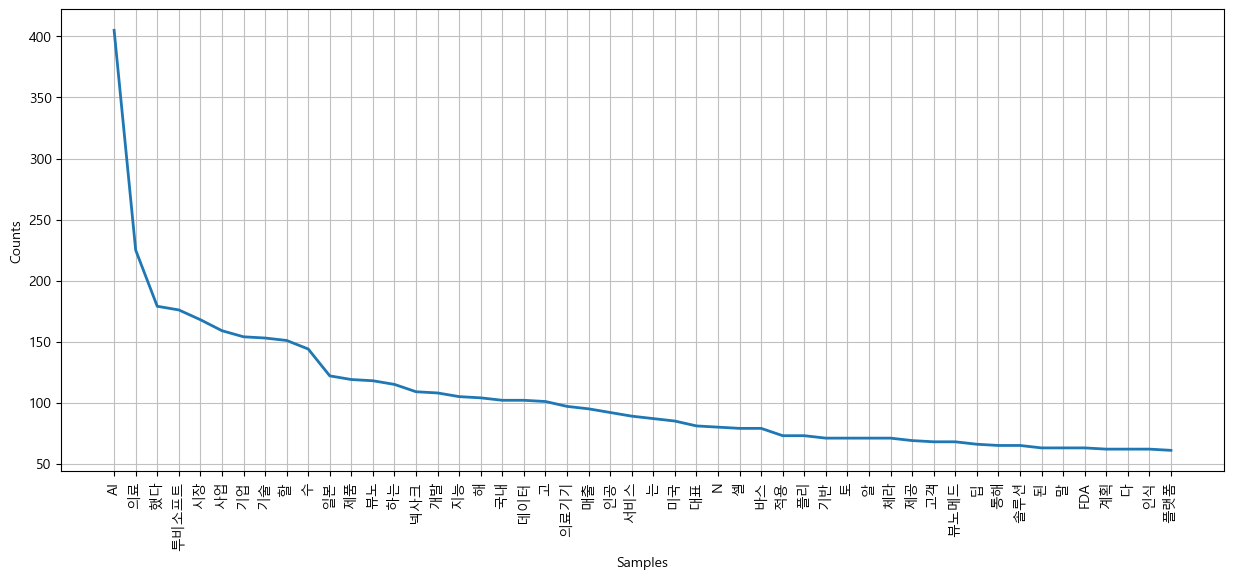

In [24]:
tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stopwords]

ko = nltk.Text(tokens_ko)

# 그래프에서 한글 폰트가 깨질 경우 실행
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

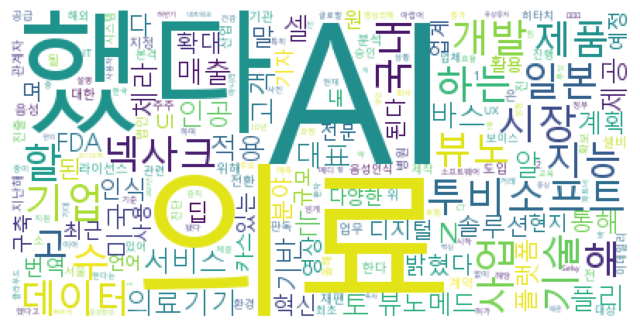

In [28]:
data = ko.vocab().most_common(300)
wordcloud = WordCloud(
                        font_path ='c:/Windows/Fonts/malgun.ttf'
                      , relative_scaling =0.2
                      , background_color ='white'
).generate_from_frequencies(dict(data))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()